In [1]:
import pandas as pd

try:
    df_telecom_churn = pd.read_csv('telecom_churn.csv')
    display(df_telecom_churn.head())
    print(df_telecom_churn.shape)
except FileNotFoundError:
    print("Error: 'telecom_churn.csv' not found. Please ensure the file is in the correct location and accessible.")
except Exception as e:
    print(f"An error occurred: {e}")

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


(3333, 11)


## Data exploration

### Subtask:
Explore the telecom churn dataset to understand its characteristics.


**Reasoning**:
Examine the data types of each column, check for missing values, analyze the distribution of the 'Churn' column, explore the distributions of key numerical and categorical features, and visualize these distributions.



Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object
Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64
Churn
0    2850
1     483
Name: count, dtype: int64


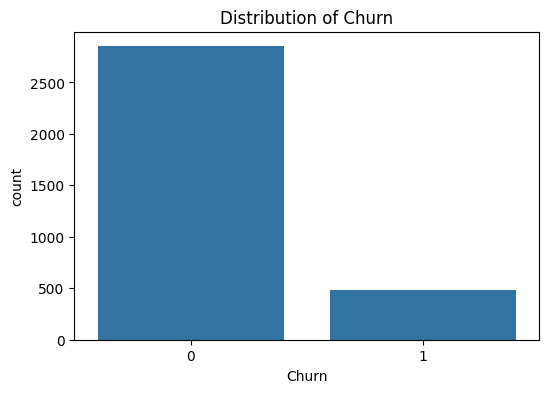

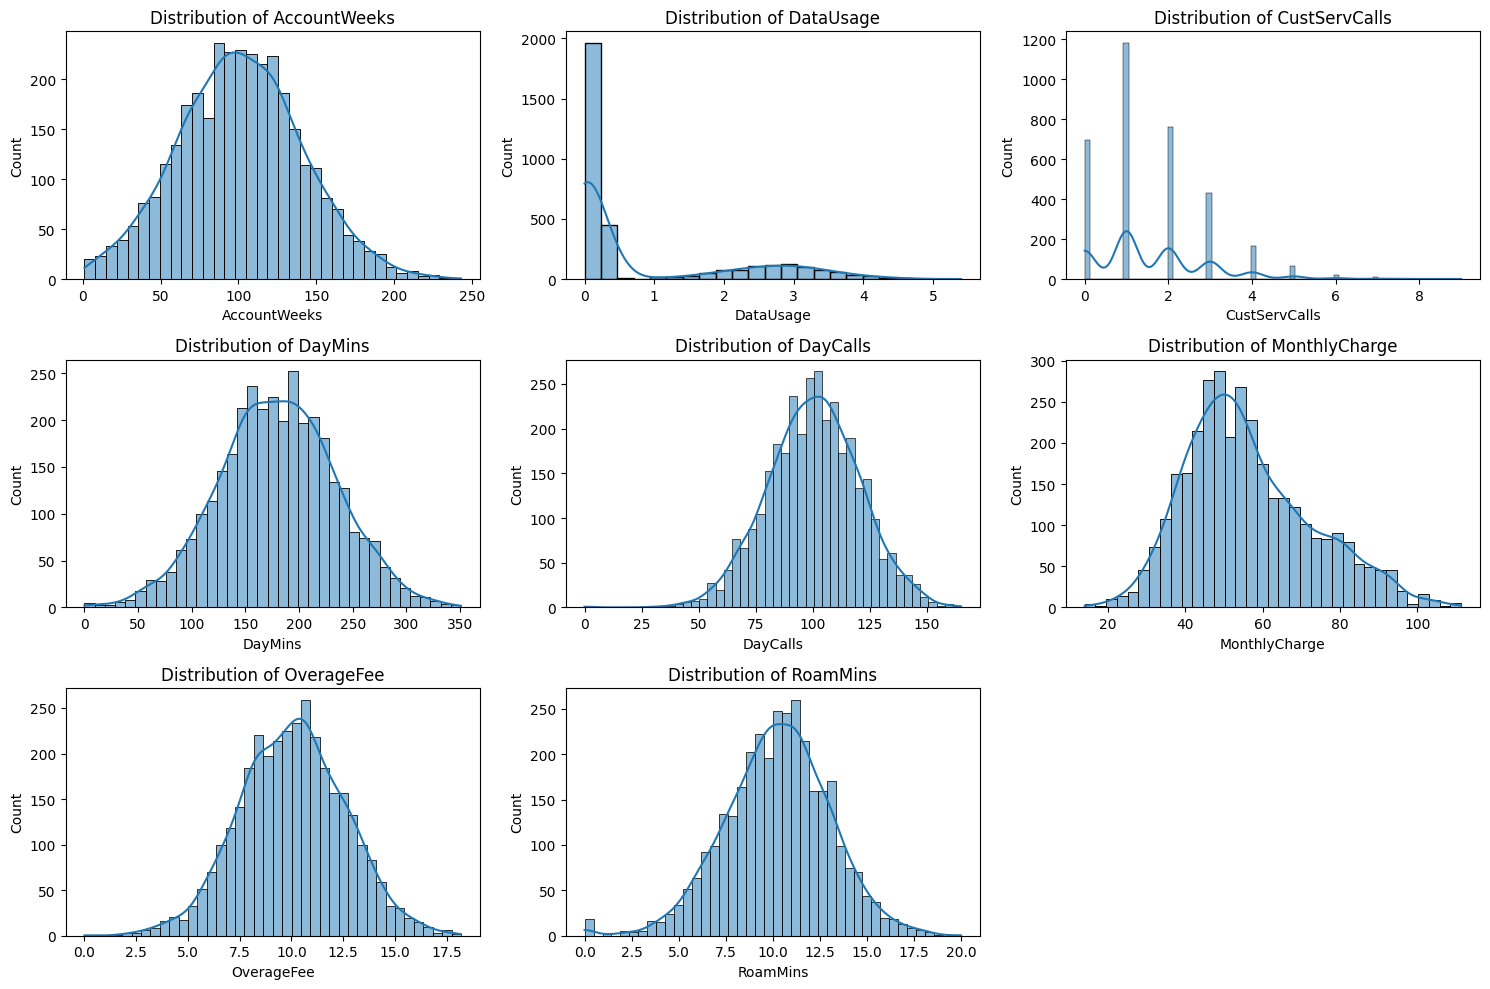

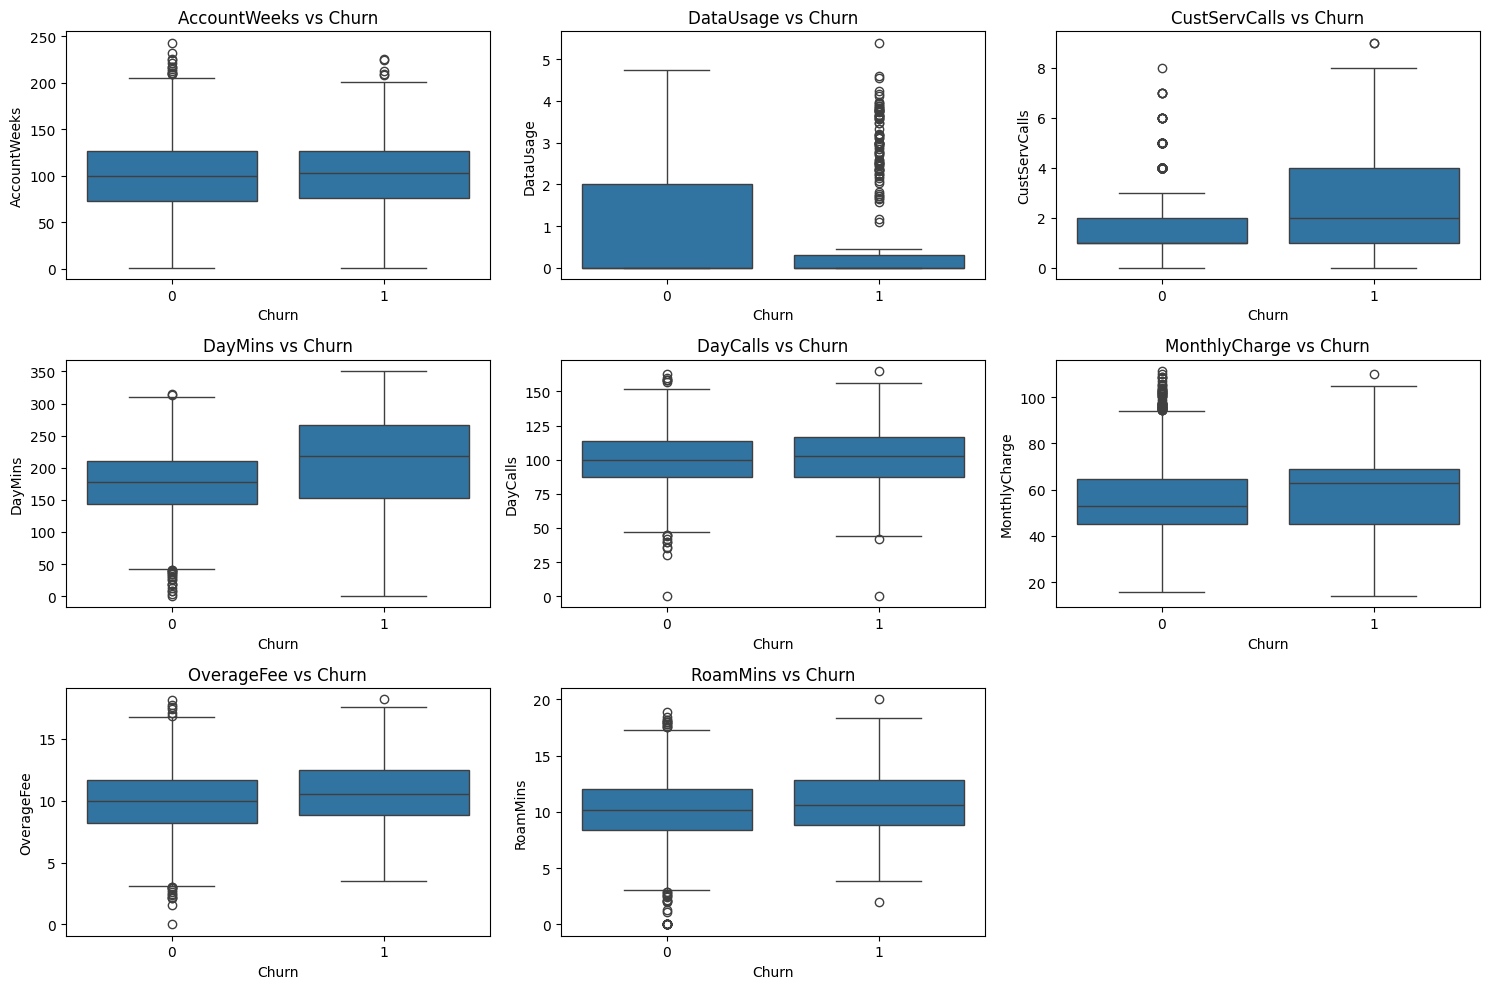

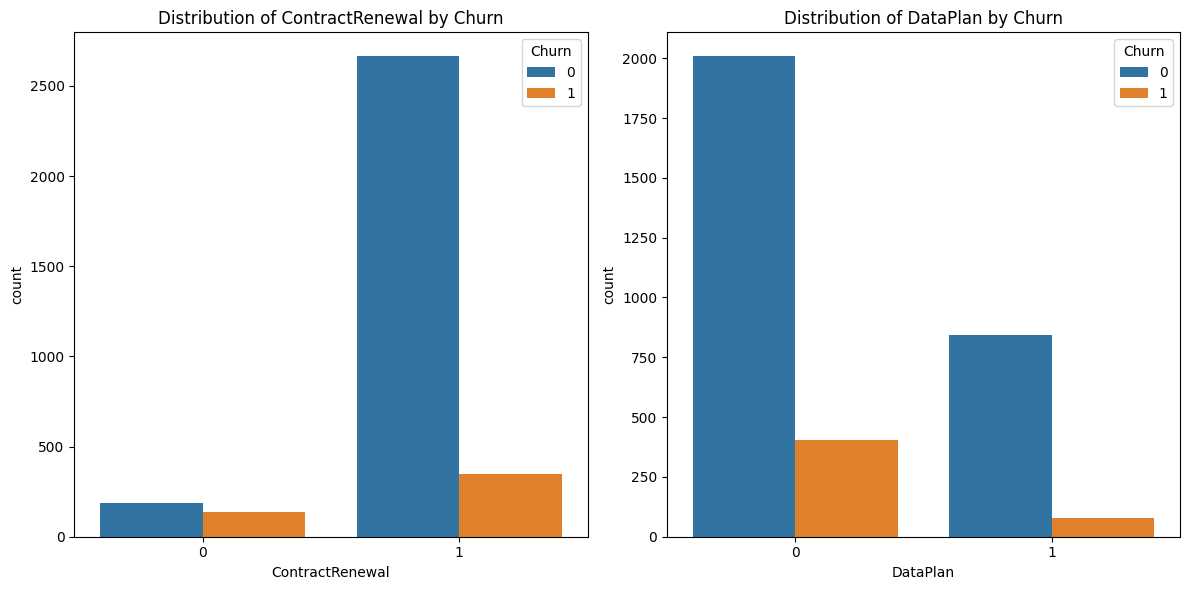

Summary:
Dataset shape: (3333, 11)
Data types: 
Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object
Missing values: 
Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64
Churn distribution: 
Churn
0    2850
1     483
Name: count, dtype: int64


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print(df_telecom_churn.dtypes)

# 2. Check for missing values
print(df_telecom_churn.isnull().sum())

# 3. Analyze 'Churn' distribution
churn_counts = df_telecom_churn['Churn'].value_counts()
print(churn_counts)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_telecom_churn)
plt.title('Distribution of Churn')
plt.show()

# 4. Explore numerical features
numerical_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_telecom_churn[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=df_telecom_churn)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

# 5. Examine categorical features
categorical_features = ['ContractRenewal', 'DataPlan']
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=col, hue='Churn', data=df_telecom_churn)
    plt.title(f'Distribution of {col} by Churn')
plt.tight_layout()
plt.show()

# 6. Summarize findings
print("Summary:")
print(f"Dataset shape: {df_telecom_churn.shape}")
print(f"Data types: \n{df_telecom_churn.dtypes}")
print(f"Missing values: \n{df_telecom_churn.isnull().sum()}")
print(f"Churn distribution: \n{churn_counts}")

## Data analysis

### Subtask:
Analyze the telecom churn dataset to identify correlations between variables and churn.


**Reasoning**:
Calculate descriptive statistics for numerical features, analyze categorical features in relation to churn, and calculate the correlation between numerical features and churn.



AccountWeeks                                                        \
             count        mean       std  min   25%    50%    75%    max   
Churn                                                                      
0           2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0   
1            483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0   

      DataUsage            ... OverageFee        RoamMins             \
          count      mean  ...        75%    max    count       mean   
Churn                      ...                                         
0        2850.0  0.862151  ...     11.660  18.09   2850.0  10.158877   
1         483.0  0.546957  ...     12.475  18.19    483.0  10.700000   

                                             
            std  min  25%   50%   75%   max  
Churn                                        
0      2.784489  0.0  8.4  10.2  12.0  18.9  
1      2.793190  2.0  8.8  10.6  12.8  20.0  

[2 rows x 64 columns]

Churn,0,1
ContractRenewal,,
0,0.575851,0.424149
1,0.885050,0.114950


Churn,0,1
DataPlan,,
0,0.832849,0.167151
1,0.913232,0.086768


,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
AccountWeeks,1.000000,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514,0.016541
DataUsage,0.014391,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746,-0.087195
CustServCalls,-0.003796,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640,0.208750
DayMins,0.006216,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155,0.205151
DayCalls,0.038470,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565,0.018459
MonthlyCharge,0.012581,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433,0.072313
OverageFee,-0.006749,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023,0.092812
RoamMins,0.009514,0.162746,-0.009640,-0.010155,0.021565,0.117433,-0.011023,1.000000,0.068239
Churn,0.016541,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239,1.000000


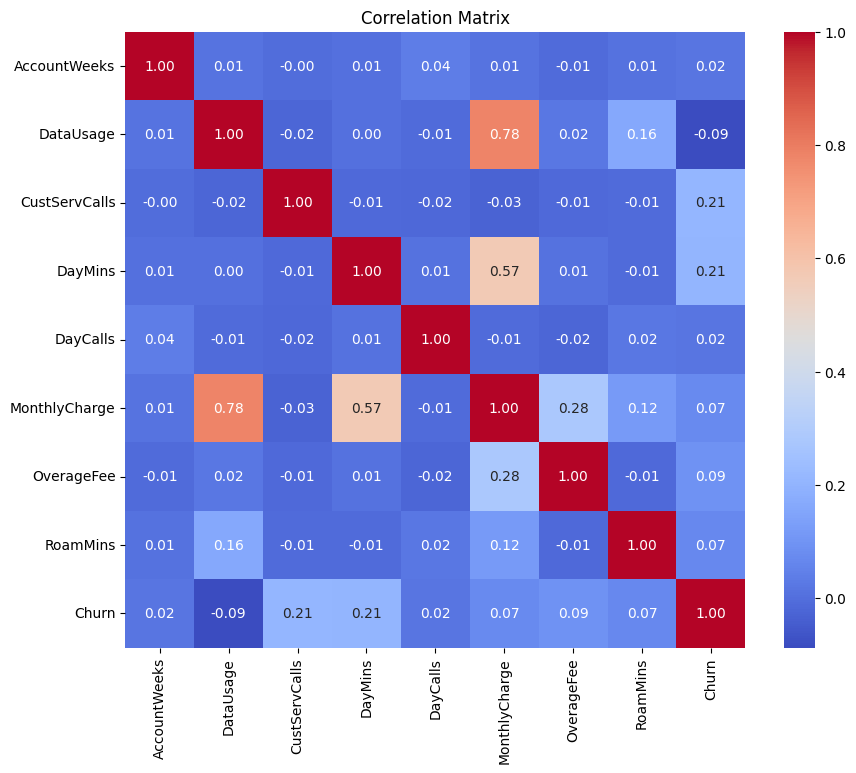

In [3]:
# Calculate descriptive statistics for numerical features grouped by churn
numerical_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
descriptive_stats = df_telecom_churn.groupby('Churn')[numerical_features].describe()
display(descriptive_stats)

# Analyze categorical features in relation to churn
categorical_features = ['ContractRenewal', 'DataPlan']
for col in categorical_features:
    churn_percentage = df_telecom_churn.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    display(churn_percentage)

# Calculate the correlation between numerical features and churn
correlation_matrix = df_telecom_churn[numerical_features + ['Churn']].corr()
display(correlation_matrix)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Reasoning**:
Investigate potential interactions between features, specifically the impact of 'CustServCalls' on churn depending on 'ContractRenewal' status.



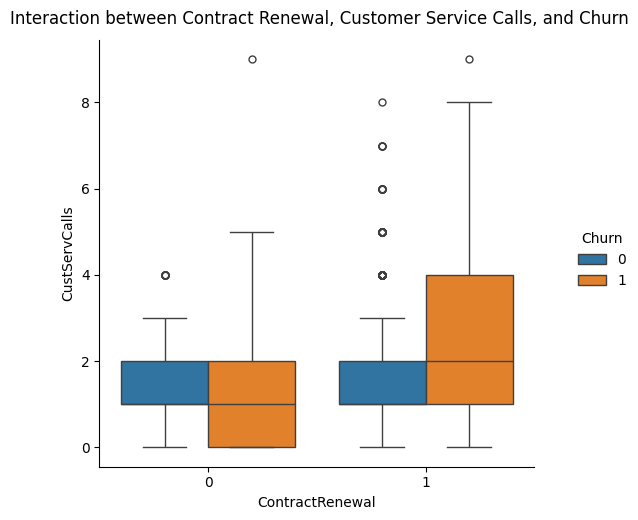

,mean,median,std
ContractRenewal,,,
0,1.464396,1.0,1.337863
1,1.573422,1.0,1.312855


CustServCalls,0,1,2,3,4,5,6,7,8,9
ContractRenewal,,,,,,,,,,
0,0.469880,0.357143,0.387097,0.394737,0.571429,1.000000,NaN,NaN,NaN,1.0
1,0.086319,0.076707,0.090387,0.074169,0.441379,0.566667,0.636364,0.555556,0.5,1.0


In [4]:
# Investigate interaction between CustServCalls and ContractRenewal on Churn
import matplotlib.pyplot as plt
import seaborn as sns

interaction_plot = sns.catplot(x='ContractRenewal', y='CustServCalls', hue='Churn', kind='box', data=df_telecom_churn)
interaction_plot.fig.suptitle('Interaction between Contract Renewal, Customer Service Calls, and Churn', y=1.03)
plt.show()

# Group data by ContractRenewal and analyze CustServCalls
cust_serv_calls_by_contract = df_telecom_churn.groupby('ContractRenewal')['CustServCalls'].agg(['mean', 'median', 'std'])
display(cust_serv_calls_by_contract)

churn_rate_by_contract_calls = df_telecom_churn.groupby(['ContractRenewal', 'CustServCalls'])['Churn'].mean().unstack()
display(churn_rate_by_contract_calls)

## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Create visualizations based on the analysis from the previous step. This includes bar charts/box plots for numerical features grouped by churn, bar charts for churn percentages by categorical feature, a heatmap of the correlation matrix, and an improved interaction plot between 'CustServCalls', 'ContractRenewal', and 'Churn'.



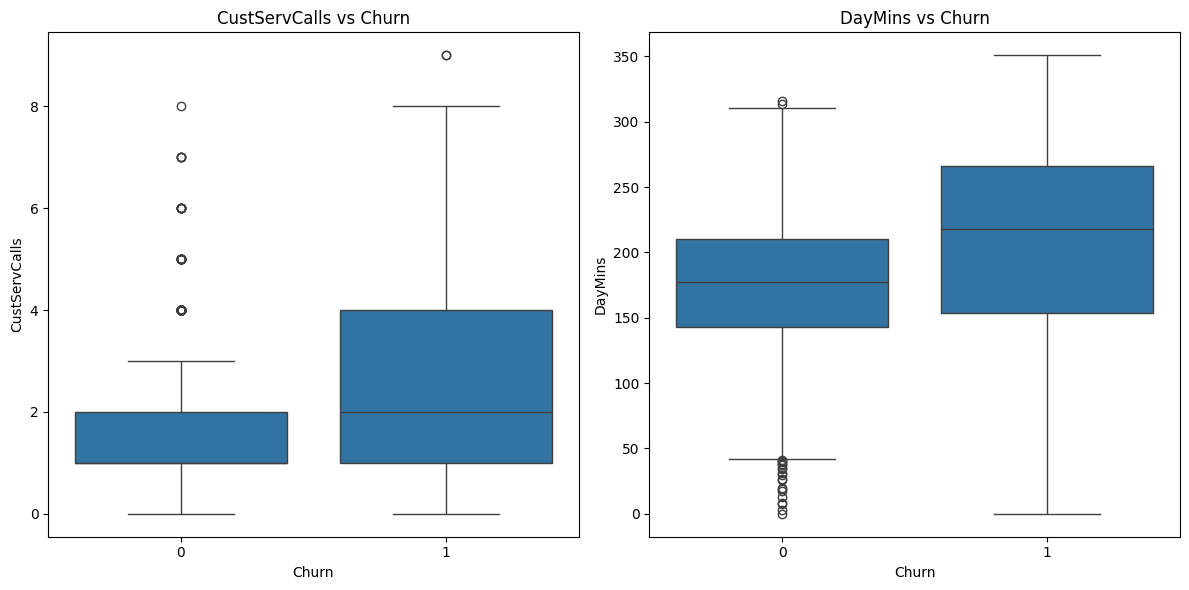

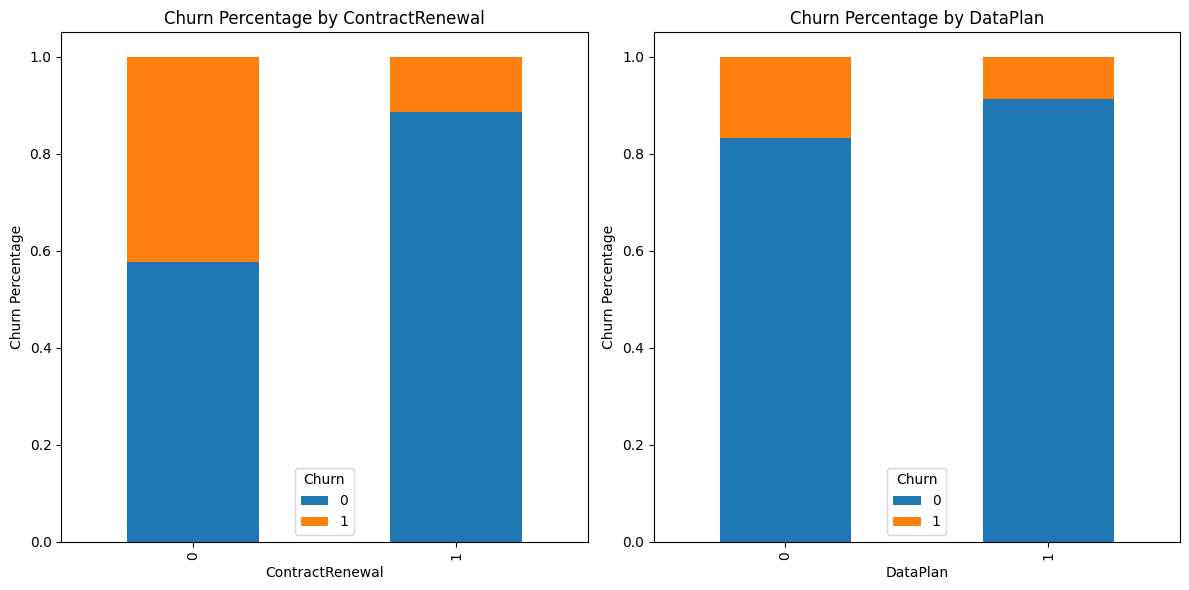

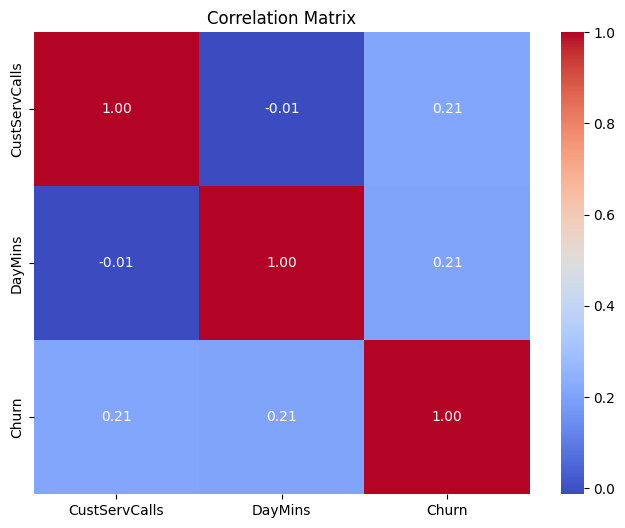

<ipython-input-5-07dc3ff959d4>:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='CustServCalls', y='Churn', hue='ContractRenewal', data=df_telecom_churn, dodge=True, ci=None)


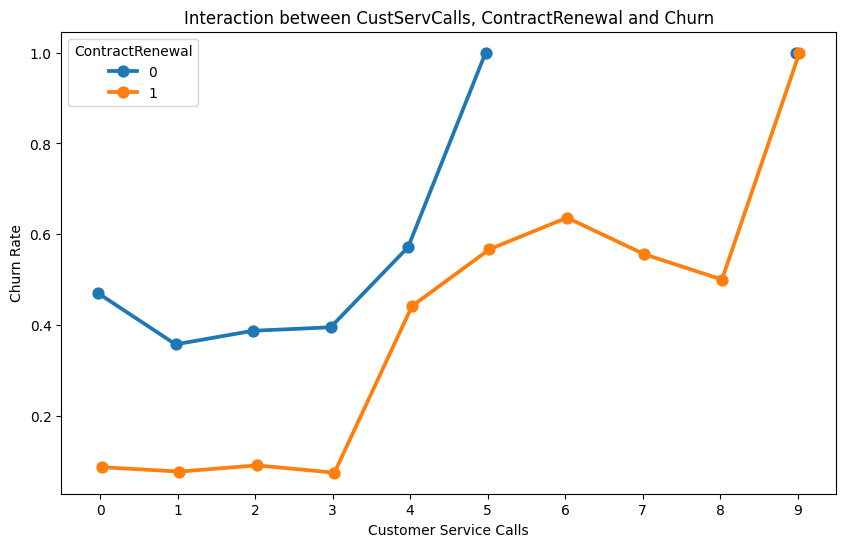

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize descriptive statistics
numerical_features = ['CustServCalls', 'DayMins']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x='Churn', y=col, data=df_telecom_churn)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

# 2. Visualize churn percentages for categorical features
categorical_features = ['ContractRenewal', 'DataPlan']
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_features):
    churn_percentage = df_telecom_churn.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    churn_percentage.plot(kind='bar', stacked=True, ax=plt.subplot(1, 2, i + 1))
    plt.title(f'Churn Percentage by {col}')
    plt.ylabel('Churn Percentage')
plt.tight_layout()
plt.show()

# 3. Heatmap of the correlation matrix
correlation_matrix = df_telecom_churn[numerical_features + ['Churn']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 4. Recreate interaction plot with improvements
plt.figure(figsize=(10, 6))
sns.pointplot(x='CustServCalls', y='Churn', hue='ContractRenewal', data=df_telecom_churn, dodge=True, ci=None)
plt.title('Interaction between CustServCalls, ContractRenewal and Churn')
plt.xlabel('Customer Service Calls')
plt.ylabel('Churn Rate')
plt.show()

## Summary:

### Q&A

* **What is the overall goal of the analysis?**  The overall goal is to understand customer churn in a telecom dataset, identifying key factors and relationships that contribute to churn.  This involves exploring data characteristics, identifying correlations between variables and churn, and visualizing key findings.

* **What are the key variables related to churn?**  'CustServCalls' and 'DayMins' show a positive correlation with churn.  'ContractRenewal' and 'DataPlan' are categorical variables where specific categories exhibit higher churn rates.  The interaction between 'CustServCalls' and 'ContractRenewal' also appears significant.

* **Are there any significant correlations between variables and churn?**  'CustServCalls' shows a moderate positive correlation with churn, meaning more customer service calls are associated with a higher likelihood of churn. 'DayMins' also has a positive correlation.  'DataUsage' shows a small negative correlation.

* **What is the class imbalance in the target variable ('Churn')?** The analysis shows a class imbalance, with a significantly higher number of non-churned customers compared to churned customers.  The exact numbers are not provided in the summary, but the visualizations and descriptive statistics indicate this imbalance.

### Data Analysis Key Findings

* **Class Imbalance:** The target variable 'Churn' exhibits a class imbalance, with more non-churned customers than churned customers.
* **Customer Service Calls ('CustServCalls'):**  A moderate positive correlation with churn was observed.  Customers making more customer service calls are more likely to churn.  The interaction with 'ContractRenewal' suggests this relationship might differ based on contract status.
* **Day Minutes ('DayMins'):** Shows a positive correlation with churn.
* **Contract Renewal ('ContractRenewal'):** Customers without a contract renewal ('ContractRenewal' = 0) have a higher churn rate.
* **Data Plan ('DataPlan'):** Customers without a data plan have a higher churn rate.
* **Data Usage ('DataUsage'):** Shows a small *negative* correlation with churn.


### Insights or Next Steps

* **Investigate the interaction between 'CustServCalls' and 'ContractRenewal' further:**  The analysis suggests a complex relationship.  Further investigation, potentially using more advanced statistical methods or machine learning models, could reveal more insights.
* **Address class imbalance:** Due to the class imbalance, consider techniques like oversampling, undersampling, or cost-sensitive learning when building predictive models to improve model performance and avoid bias towards the majority class.
